In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import joblib
from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("Datasets/electric_vehicles_spec_2025.csv.csv")

df

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [12]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


In [13]:
df.describe

<bound method NDFrame.describe of        brand                    model  top_speed_kmh  battery_capacity_kWh  \
0     Abarth         500e Convertible            155                  37.8   
1     Abarth           500e Hatchback            155                  37.8   
2     Abarth      600e Scorpionissima            200                  50.8   
3     Abarth             600e Turismo            200                  50.8   
4     Aiways                       U5            150                  60.0   
..       ...                      ...            ...                   ...   
473    Zeekr           7X Premium RWD            210                  71.0   
474    Zeekr        X Core RWD (MY25)            190                  49.0   
475    Zeekr  X Long Range RWD (MY25)            190                  65.0   
476    Zeekr   X Privilege AWD (MY25)            190                  65.0   
477  firefly                      NaN            150                  41.2   

    battery_type  number_of_c

In [14]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [21]:
df["model"].fillna(df["model"].mode()[0], inplace=True)


In [22]:
df["number_of_cells"].fillna(df["number_of_cells"].mean(), inplace = True )


In [23]:
df["torque_nm"].fillna(df["torque_nm"].mean(), inplace = True )

In [24]:
df["fast_charging_power_kw_dc"].fillna(df["fast_charging_power_kw_dc"].mean(), inplace = True )

In [26]:
df["fast_charge_port"].fillna(df["fast_charge_port"].mode()[0], inplace=True)


In [27]:
df["towing_capacity_kg"].fillna(df["towing_capacity_kg"].mean(), inplace = True )

In [35]:
print(df["cargo_volume_l"].dtype)
print(df["cargo_volume_l"].unique()[:10])
df["cargo_volume_l"] = df["cargo_volume_l"].astype(str).str.extract("(\d+)").astype(float)
df["cargo_volume_l"].fillna(df["cargo_volume_l"].mean(), inplace=True)


float64
[185. 360. 496. 472. 400. 326. 502. 520. 535. 526.]


In [36]:
df.isnull().sum()

brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
dtype: int64

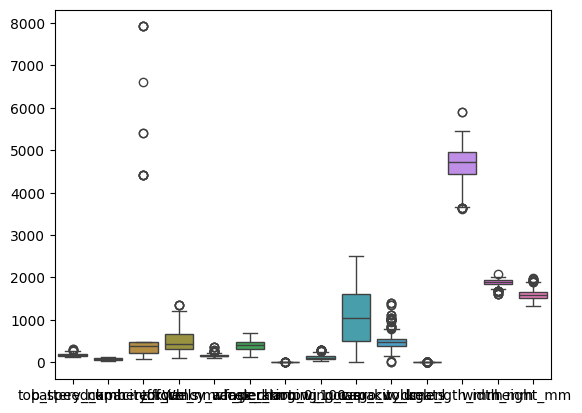

In [37]:
sns.boxplot(df)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      478 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            478 non-null    float64
 6   torque_nm                  478 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  478 non-null    float64
 11  fast_charge_port           478 non-null    object 
 12  towing_capacity_kg         478 non-null    float64
 13  cargo_volume_l             478 non-null    float64

In [39]:
label_encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [40]:
df

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,0,46,155,37.8,0,192.000000,235.0,156,225,7.0,...,0.000000,185.0,4,1,1,3673,1683,1518,2,87
1,0,47,155,37.8,0,192.000000,235.0,149,225,7.0,...,0.000000,185.0,4,1,1,3673,1683,1518,2,86
2,0,51,200,50.8,0,102.000000,345.0,158,280,5.9,...,0.000000,360.0,5,1,9,4187,1779,1557,4,366
3,0,52,200,50.8,0,102.000000,345.0,158,280,6.2,...,0.000000,360.0,5,1,9,4187,1779,1557,4,365
4,1,396,150,60.0,0,485.293478,310.0,156,315,7.5,...,1052.261062,496.0,5,1,10,4680,1865,1700,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,57,57,210,71.0,0,485.293478,440.0,148,365,6.0,...,2000.000000,539.0,5,2,11,4787,1930,1650,4,389
474,57,401,190,49.0,0,485.293478,343.0,148,265,5.9,...,1600.000000,362.0,5,2,9,4432,1836,1566,4,474
475,57,402,190,65.0,0,485.293478,343.0,146,360,5.6,...,1600.000000,362.0,5,2,9,4432,1836,1566,4,475
476,57,403,190,65.0,0,485.293478,543.0,153,350,3.8,...,1600.000000,362.0,5,0,9,4432,1836,1566,4,476


In [41]:
df['brand'] = df['brand'].astype(int)
df['model'] = df['model'].astype(int)
df['battery_type'] = df['battery_type'].astype(int)
df['fast_charge_port'] = df['fast_charge_port'].astype(int)
df['cargo_volume_l'] = df['cargo_volume_l'].astype(int)
df['drivetrain'] = df['drivetrain'].astype(int)
df['segment'] = df['segment'].astype(int)
df['car_body_type'] = df['car_body_type'].astype(int)
df['source_url'] = df['source_url'].astype(int)


In [42]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    int64  
 1   model                      478 non-null    int64  
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    int64  
 5   number_of_cells            478 non-null    float64
 6   torque_nm                  478 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  478 non-null    float64
 11  fast_charge_port           478 non-null    int64  
 12  towing_capacity_kg         478 non-null    float64
 13  cargo_volume_l             478 non-null    int64  

In [44]:
numeric_cols = df.select_dtypes(include='number').columns[:-1]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Use this to remove outliers completly

In [45]:
numeric_cols = df.select_dtypes(include='number').columns[:-1]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()

    df[col] = df[col].apply(lambda x: median if x < lower or x > upper else x)



# Use this to replace outliers by medians 

In [46]:
model = linear_model.LinearRegression()

In [47]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [48]:
df_x = df[['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url']]
df_y = df['efficiency_wh_per_km']

In [49]:
df_x

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
2,0,51,200.0,50.8,0,102.000000,345.0,280,5.9,79.0,...,0.000000,360,5,1,9.0,4187.0,1779,1557.0,4,366
3,0,52,200.0,50.8,0,102.000000,345.0,280,6.2,79.0,...,0.000000,360,5,1,9.0,4187.0,1779,1557.0,4,365
4,1,396,150.0,60.0,0,485.293478,310.0,315,7.5,78.0,...,1052.261062,496,5,1,10.0,4680.0,1865,1700.0,4,27
5,1,397,160.0,60.0,0,485.293478,315.0,350,7.0,78.0,...,1052.261062,472,5,1,10.0,4805.0,1880,1641.0,4,50
6,2,345,150.0,50.8,0,102.000000,260.0,320,9.0,85.0,...,0.000000,400,5,1,9.0,4173.0,1781,1532.0,4,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,56,228,200.0,75.8,0,485.293478,430.0,395,6.4,170.0,...,1500.000000,660,5,2,12.0,4891.0,1937,1680.0,4,71
473,57,57,210.0,71.0,0,485.293478,440.0,365,6.0,110.0,...,2000.000000,539,5,2,11.0,4787.0,1930,1650.0,4,389
474,57,401,190.0,49.0,0,485.293478,343.0,265,5.9,70.0,...,1600.000000,362,5,2,9.0,4432.0,1836,1566.0,4,474
475,57,402,190.0,65.0,0,485.293478,343.0,360,5.6,114.0,...,1600.000000,362,5,2,9.0,4432.0,1836,1566.0,4,475


In [50]:
df_y

2      158.0
3      158.0
4      156.0
5      150.0
6      128.0
       ...  
464    165.0
473    148.0
474    148.0
475    146.0
476    153.0
Name: efficiency_wh_per_km, Length: 201, dtype: float64

In [51]:
x_train , x_test , y_train , y_test = train_test_split(df_x , df_y , test_size = 0.33 , random_state = 42)

In [52]:
model.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
print(model.coef_)

[-1.80143833e-02  6.23563180e-03  1.62828576e-01  7.17406064e-01
  6.99440506e-15 -2.03041592e-02  1.72726610e-03 -1.29996484e-01
 -1.88465795e+00 -5.80467472e-02 -2.30718222e-15  2.01935599e-03
 -8.16570539e-03 -1.11022302e-16 -8.59035315e-01 -1.87871796e+00
  2.92663834e-02 -6.69543898e-02  9.28714519e-02  0.00000000e+00
 -1.00709124e-02]


In [54]:
y_pred = model.predict(x_test)
print(y_pred)

[162.20086704 163.87952442 166.96277046 142.4762632  174.68871014
 158.0422961  161.35866192 160.41341778 157.83384614 149.05477665
 144.53702714 141.24574739 168.31824172 147.59777486 152.98109824
 140.92918877 152.5859618  150.68359235 158.34225517 149.21169911
 173.96199251 162.46181941 152.94987695 154.17057375 178.48844347
 165.32150599 164.82888531 156.15014596 177.24439291 130.89274552
 160.23087987 167.54434041 153.2691751  132.08782419 149.25112243
 154.25441659 140.65160291 144.87463264 168.322077   132.91788524
 155.66019202 150.10655185 131.78329038 142.88143542 147.95363557
 159.44962589 146.15745896 179.34330478 145.89620136 141.19946841
 146.12653699 151.97665299 144.57196122 155.67922231 133.95966054
 130.67724525 147.64229742 174.87234036 156.22442316 170.23132268
 174.85712734 164.1725176  167.71082336 162.42238226 152.10496315
 138.48216264 156.33707823]


In [55]:
mean_squared_error(y_test , y_pred)

123.31300750317037

In [56]:
r2_score(y_test , y_pred) * 100

63.96117087622222

In [57]:
model.score(x_train , y_train)

0.6411929886636918

In [58]:
model.score(x_test , y_test)

0.6396117087622222

In [59]:
joblib.dump(model , "Models/electric_vehicles_spec_2025.pkl")

['Models/electric_vehicles_spec_2025.pkl']